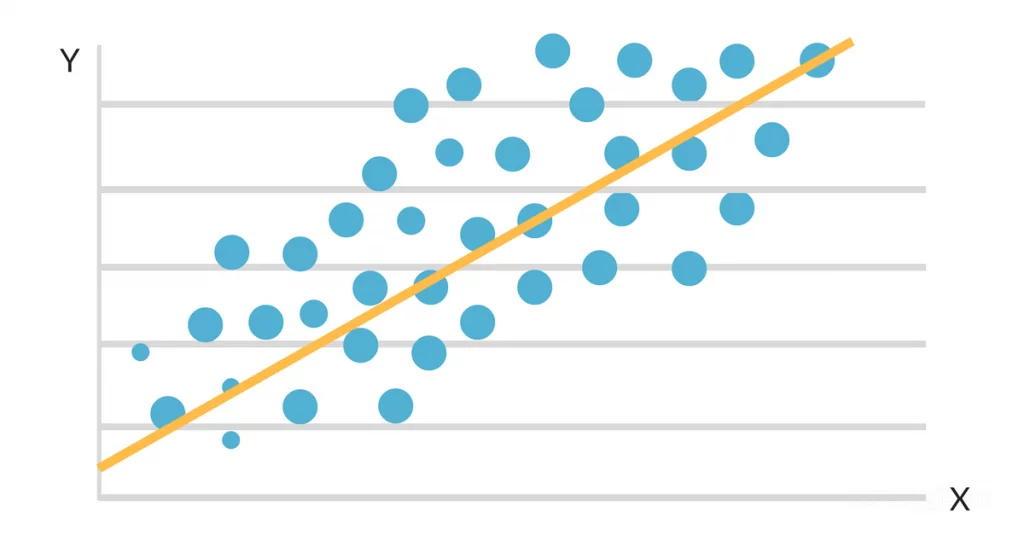

In [1]:
import numpy as np
import pandas as pd

In [2]:
housing_prices = pd.read_csv('California Housing Prices.csv')
print(housing_prices.shape)
housing_prices.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Target
y = housing_prices['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [4]:
# Remove some data
housing_prices.columns.to_list()
prices = housing_prices[(housing_prices.ocean_proximity == '<1H OCEAN') | (housing_prices.ocean_proximity == 'INLAND')]
prices

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Unique values before
housing_prices.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# Unique values after
prices.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64

In [7]:
# Remove ocean_proximity column
prices = prices.drop(axis=1, columns='ocean_proximity')
prices.columns.tolist()  # inplace=True calls warning

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

# Question 1

There's one feature with missing values. What is it?

In [8]:
prices.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### total_bedrooms has missing values

# Question 2

What's the median (50% percentile) for variable 'population'?

In [9]:
prices.population.median()

1195.0

In [10]:
prices.describe().population['50%']

1195.0

In [11]:
# Split data in train/val/test sets, with 60%/20%/20% distribution
observations = prices.shape[0]

train = int(observations * 0.6)
test = int(observations * 0.2)
val = int(observations * 0.2)

difference = observations - (train + test + val)
print(difference)
train += difference
observations == train + test + val

1


True

In [12]:
# Shuffle the dataset (the filtered one you created above), use seed 42
np.random.seed(42)
index = np.arange(observations)
np.random.shuffle(index)
shuffled = prices.iloc[index]
shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [13]:
# Split data into X and y and drop target from X
X_train = shuffled.iloc[:train].reset_index(drop=True)
X_val = shuffled.iloc[train: train + val].reset_index(drop=True)
X_test = shuffled.iloc[train + val :].reset_index(drop=True)

y_train = X_train.median_house_value.values
y_val = X_val.median_house_value.values
y_test= X_test.median_house_value.values

X_train.drop(columns='median_house_value', axis=1, inplace=True)
X_val.drop(columns='median_house_value', axis=1, inplace=True)
X_test.drop(columns='median_house_value', axis=1, inplace=True)
X_train.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [14]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

[numpy.log1p](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)

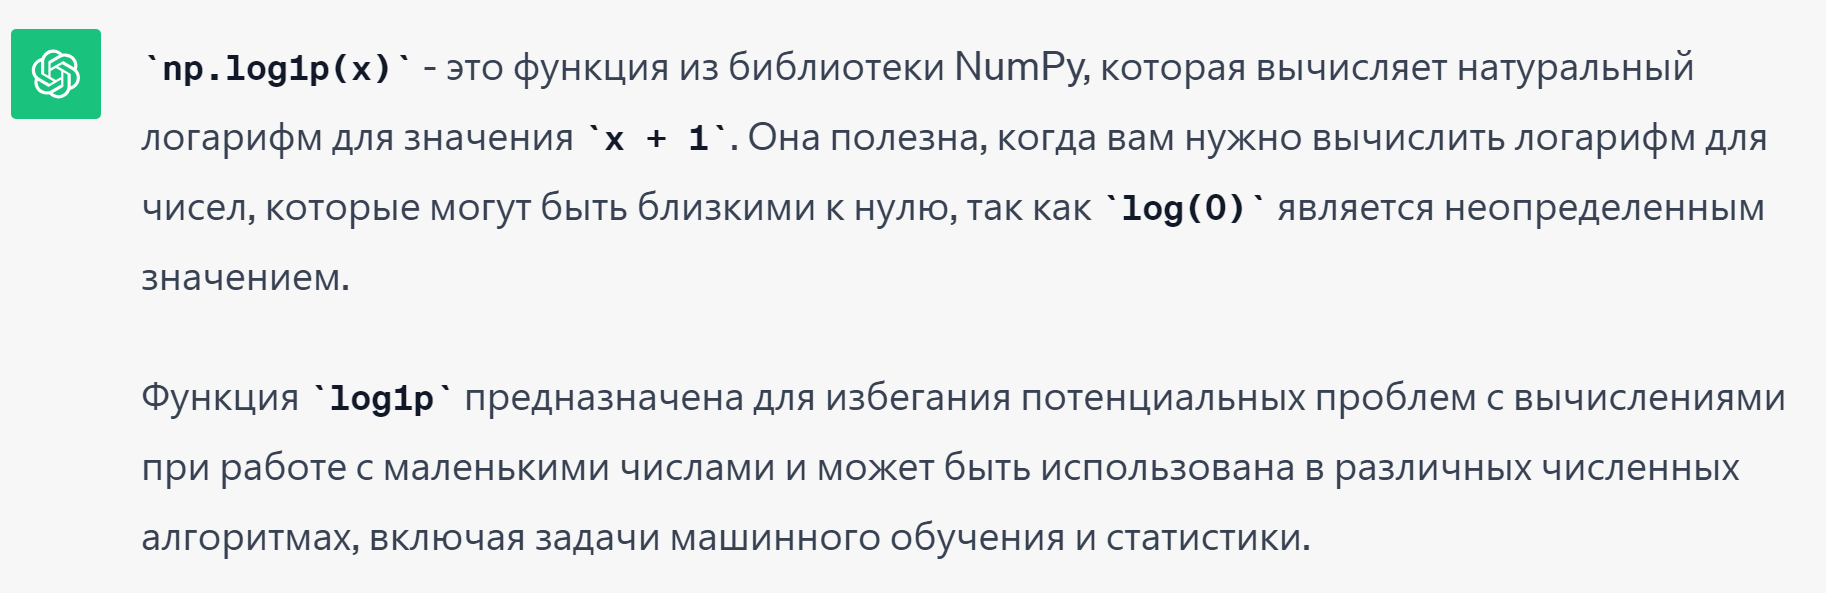

# Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [15]:
# Create RMSE function
def RMSE(y_true, y_pred):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

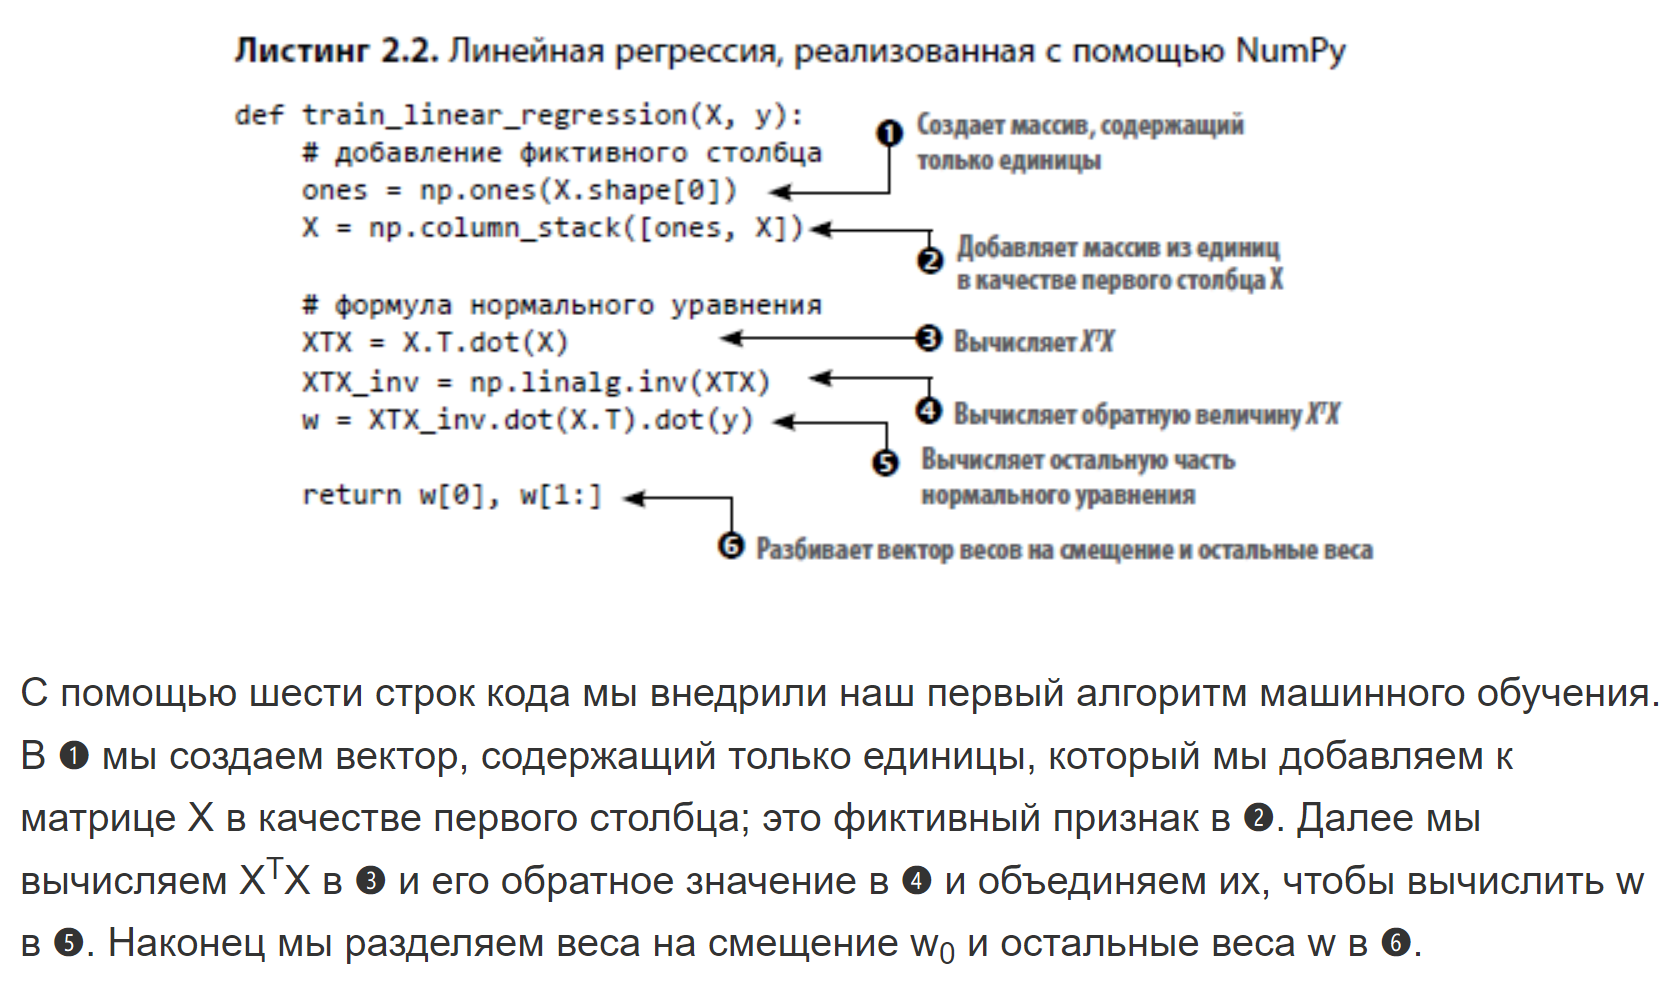

### From book below

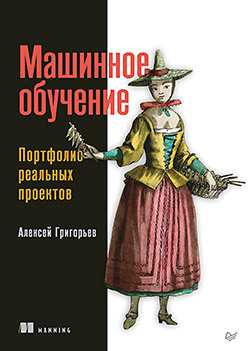

In [16]:
# Linear regression without regularization
def train_linear_regression(X, y):
    # Add artificial column
    ones = np.ones(X.shape[0])
    X = np.column_stack(tup=[ones, X])
    
    # Formula of normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Find RMSE with .fillna(mean)

In [17]:
# Fill in train data
mean = X_train['total_bedrooms'].mean()
X_train_mean = X_train.fillna(value=mean)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Fill in val data
X_val_mean = X_val.fillna(value=mean)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# Get RMSE (mean) Score
np.round(RMSE(y_true=y_val, y_pred=y_pred_mean), 2)

0.34

### Find RMSE with .fillna(0)

In [18]:
# Fill in train data
X_train_zero = X_train.fillna(value=0)
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Fill in val data
X_val_zero = X_val.fillna(value=0)
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

# Get RMSE (mean) Score
np.round(RMSE(y_true=y_val, y_pred=y_pred_zero), 2)

0.34

# .fillna() with mean so with 0 gave the same result!

# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [19]:
# Linear regression with regularization
def train_linear_regression_regularized(X, y, r):
    # Add artificial column
    ones = np.ones(X.shape[0])
    X = np.column_stack(tup=[ones, X])
    
    # Formula of normal equation
    XTX = X.T.dot(X)
    regularization = r * np.eye(XTX.shape[0])
    XTX += regularization
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [20]:
# Find best r-coefficient of regularization
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_regularized(X_train_zero, y_train, r)
    y_reg_val = w0 + X_val_zero.dot(w)
    RMSE_val = np.round(RMSE(y_val, y_reg_val), 2)
    print(f'r = {r}')
    print(f'w0 = {w0}')
    print(f'RMSE_val = {RMSE_val}')
    print('\n', '-' * 80, '\n')        

r = 0
w0 = -9.763249478233348
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 1e-06
w0 = -9.763228831250228
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 0.0001
w0 = -9.76118523564182
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 0.001
w0 = -9.742646249775225
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 0.01
w0 = -9.561056193061212
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 0.1
w0 = -8.058889769717469
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 1
w0 = -3.1331542785801956
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 5
w0 = -0.8410867975088877
RMSE_val = 0.35

 ----------------

### All r gives equal RMSE for validation data then r=0 is correct response

# Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [21]:
# Best seed for RMSE

rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    index = np.arange(observations)
    np.random.seed(r)
    np.random.shuffle(index)

    shuffled = prices.iloc[index]
    
    X_train = shuffled.iloc[:train].reset_index(drop=True)
    X_val = shuffled.iloc[train: train + val].reset_index(drop=True)
    X_test = shuffled.iloc[train + val:].reset_index(drop=True)
    
    y_train = X_train.median_house_value.values
    y_val = X_val.median_house_value.values
    y_test = X_test.median_house_value.values

    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)
    
    X_train.drop(columns='median_house_value', axis=1, inplace=True)
    X_val.drop(columns='median_house_value', axis=1, inplace=True)
    X_test.drop(columns='median_house_value', axis=1, inplace=True)
    
    # Fill in train data
    X_train_zero = X_train.fillna(value=0)
    w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

    # Fill in val data
    X_val_zero = X_val.fillna(value=0)
    y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

    # Get RMSE (mean) Score
    rmse_val = np.round(RMSE(y_true=y_val, y_pred=y_pred_zero), 2)   
    rmse_list.append(rmse_val)
    
    print(f'r = {r}')
    print(f'w0 = {w0_zero}')
    print(f'RMSE_val = {rmse_val}')
    print('\n', '-' * 80, '\n')

r = 0
w0 = -9.870068970758581
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 1
w0 = -9.114011209778669
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 2
w0 = -9.9115602006467
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 3
w0 = -10.233183681368352
RMSE_val = 0.33

 -------------------------------------------------------------------------------- 

r = 4
w0 = -9.174763450685843
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 5
w0 = -10.006648303737308
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 6
w0 = -10.039903099850587
RMSE_val = 0.34

 -------------------------------------------------------------------------------- 

r = 7
w0 = -10.353545445248718
RMSE_val = 0.35

 ---------------------------------

In [22]:
rmse_list

[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]

In [23]:
# Find standard deviation among rmse list
np.round(np.std(rmse_list), 3)

0.006

### Correct answer for question 5 is 0.006 (almost 0.005)

# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [24]:
r = 9

idx = np.arange(observations)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = prices.iloc[idx]
    
df_train = df_shuffled.iloc[:train].copy()
df_val = df_shuffled.iloc[train:train+val].copy()
df_test = df_shuffled.iloc[train+val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

X_null_train_val = df_train_val.fillna(value=0)
w_0_train_val, w_train_val = train_linear_regression_regularized(X_null_train_val, y_train_val, r=0.001)

X_null_test = df_test.fillna(value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(RMSE(y_test, y_null_pred_test),2)

0.33

### Q6 answer is 0.33